<img src="https://electronaut.info/wp-content/uploads/2017/05/Tubescape_jupyter2.jpg">

<h1><font color = b30000>TUBE DATA MATCHER for uTRACER FILES</font></h1><h5>Anode current for a sweep of grid voltages  when anode voltage = constant</h5>


# STEP 1 — Import and process tube data, build dataframe.

In [1]:
from electronaut_uTracer_Import import *
# For some reason, .describe is requiring the .astype(float) in order to show the stats.
df_stats = df.astype(float).describe()
df_stats.loc[:, 'tube_type'] = df_stats.loc[:, 'tube_type'].astype(int)
df_stats.loc[:, 'tube_ID'] = df_stats.loc[:, 'tube_ID'].astype(int)
# df_stats.loc[:, 'tube_ID'] = df_stats.loc[:, 'tube_ID'].astype(str)

Please enter the path to the folder containing the uTracer files: /Users/rrmc/Desktop/McSnare

What type of tubes are these? 5749

— — — — — 

Data from 323 tubes of type 5749 was successfully read.
A dataframe containing all 323 tubes was successfully created.


In [2]:
df_stats.loc['stdev_high'] =  df_stats.loc[['mean', 'std']].sum(axis=0)
df_stats.loc['stdev_low'] = df_stats.loc['mean'] - df_stats.loc['std']
df_stats

,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
count,323.0,323.0,323.0,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,418.0,5749.0,325.0,79.031170,51.047310,33.910768,25.196356,19.226402,14.779105,11.466080,9.005381,7.201418,5.900056,4.950139,4.227372,3.674910
std,117.0,0.0,0.0,10.946130,6.797600,4.669699,3.538218,2.871999,2.412285,2.065642,1.784736,1.542461,1.328074,1.140065,0.983563,0.863331
min,198.0,5749.0,325.0,40.505000,28.479000,18.082000,12.885000,9.645000,7.227000,5.406000,4.089000,3.161000,2.523000,2.062000,1.711000,1.440000
25%,316.0,5749.0,325.0,71.190000,46.534500,31.226500,23.243500,17.598500,13.358000,10.224500,7.911500,6.274500,5.143000,4.276500,3.664500,3.156000
50%,437.0,5749.0,325.0,79.456000,51.526000,34.048000,25.221000,19.099000,14.633000,11.281000,8.843000,7.071000,5.765000,4.822000,4.109000,3.566000
75%,520.0,5749.0,325.0,87.773500,56.625000,37.449500,27.852500,21.220500,16.439000,12.824000,10.125500,8.142000,6.665500,5.571000,4.759500,4.121000
max,601.0,5749.0,325.0,108.434000,72.369000,51.892000,41.190000,33.994000,28.317000,23.830000,20.269000,17.380000,14.999000,13.004000,11.294000,9.931000
stdev_high,535.0,5749.0,325.0,89.977301,57.844910,38.580467,28.734574,22.098401,17.191390,13.531723,10.790117,8.743879,7.228130,6.090204,5.210935,4.538241
stdev_low,301.0,5749.0,325.0,68.085040,44.249709,29.241068,21.658138,16.354404,12.366820,9.400438,7.220644,5.658957,4.571982,3.810074,3.243808,2.811579


# Plot a graph of all tubes


In [65]:
min_ = list(df_stats.loc['min'])[3:]
mean_ = list(df_stats.loc['mean'])[3:]
max_ = list(df_stats.loc['max'])[3:]
quarter_ = list(df_stats.loc['25%'])[3:]
half_ = list(df_stats.loc['50%'])[3:]
three_quarter_ = list(df_stats.loc['75%'])[3:]

stdev_high = list(df_stats.loc['stdev_high'])[3:]
stdev_low = list(df_stats.loc['stdev_low'])[3:]


# Plot a line graph of all tubes

from bokeh.plotting import figure, output_file, show
output_file("Tube_Batch_Statistics.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df_stats.columns)
stats_columns = []
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

# Add all rows of tubes
# for i in range(len(df.index)):
for i in range(len(df.index)):
    row = list(df.iloc[i])[3:]
    p.line(x_values, row, line_width=2)

# Add Stats
# p.line(x_values, min_, line_width=2, color='red')
p.line(x_values, mean_, line_width=2, color='green')
# p.line(x_values, max_, line_width=2, color='red')
p.line(x_values, quarter_, line_width=2, color='red')
p.line(x_values, half_, line_width=2, color='black')
p.line(x_values, three_quarter_, line_width=2, color='red')
p.line(x_values, stdev_high, line_width=2, color='yellow')
p.line(x_values, stdev_low, line_width=2, color='yellow')




# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# Function to produce a list of tubes that are outside of x stdev

In [ ]:
df = df.apply(pd.to_numeric, errors='ignore')

# bias_list = [i for i in df.columns][3:]

# for i in bias_list:
#     df[[bias_list[i]]] = df[[bias_list[i]]].apply(pd.to_numeric)

# df[['Bias_10','Bias_14']] = df[['Bias_10','Bias_14']].apply(pd.to_numeric)
# df[['Bias_18','Bias_22']] = df[['Bias_18','Bias_22']].apply(pd.to_numeric)
# df[['Bias_26','Bias_30']] = df[['Bias_26','Bias_30']].apply(pd.to_numeric)
# df[['Bias_10','Bias_14']] = df[['Bias_10','Bias_14']].apply(pd.to_numeric)

df.head()

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df.Bias_2)
sns.distplot(df.Bias_6)
sns.distplot(df.Bias_10)
sns.distplot(df.Bias_14)
sns.distplot(df.Bias_18)
sns.distplot(df.Bias_22)
sns.distplot(df.Bias_26)
sns.distplot(df.Bias_30)
sns.distplot(df.Bias_34)
sns.distplot(df.Bias_38)
sns.distplot(df.Bias_42)
sns.distplot(df.Bias_46)
sns.distplot(df.Bias_50)
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [5]:
# df_scatter = df.copy(deep=True)
df_scatter = df[['Bias_2','Bias_6', 'Bias_10', 'Bias_14', 'Bias_18', 'Bias_22', 'Bias_26', 'Bias_30', 'Bias_34', 'Bias_38', 'Bias_42', 'Bias_46', 'Bias_50']]
df_scatter.head()

,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,95.683,61.076,41.02,30.853,24.037,18.882,14.949,11.944,9.677,7.98,6.698,5.718,5.018
1,61.619,38.735,25.431,19.238,14.687,11.189,8.626,6.769,5.411,4.438,3.757,3.28,2.933
2,76.811,49.356,32.624,23.867,17.923,13.45,10.091,7.651,5.928,4.754,3.962,3.346,2.848
3,59.719,37.534,24.285,17.773,13.048,9.584,7.061,5.292,4.105,3.325,2.805,2.418,2.118
4,69.774,45.639,30.419,22.742,17.214,13.077,9.996,7.71,6.074,4.911,4.092,3.495,3.045


# Scatter Plot

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_scatter, alpha=0.2, figsize=(24, 24), diagonal=100)
plt.show()

ValueError: num must be 1 <= num <= 0, not 1

In [27]:
# Plot using Seaborn
sns.lmplot(x='Bias_2', y='Bias_50', data=df_scatter,
           fit_reg=False)

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()

TypeError: Could not convert 5.0182.9332.8482.1183.0452.9064.1143.14.1632.4794.6035.1043.3713.9773.694.0743.0053.6063.242.9173.3083.2033.4662.9312.4894.3054.4943.433.9753.732.9073.5443.5532.7813.0913.9513.6053.4693.1074.4534.5354.2823.5724.0935.6823.6042.981.6133.0393.613.0483.0391.444.333.5914.1054.1073.3822.7924.6534.4333.9983.3914.5273.2017.5083.9694.5273.5553.2763.152.9922.5375.1724.3224.1114.0714.9634.2223.9724.4533.5363.4383.4124.1313.7574.4874.2343.7653.6143.5573.9963.8154.1284.2693.5223.5654.8114.7394.584.4623.7954.1324.1163.5532.4794.8114.3054.8652.6093.623.383.4384.2264.0514.6283.4313.413.3534.6953.0343.9134.454.0383.4094.8644.6053.9183.8713.2434.4374.3024.4684.2524.1293.3463.822.9483.8762.3973.542.9613.7484.2234.0653.0424.4853.3233.333.214.5473.7143.9413.8373.8413.6243.7122.9953.8513.4584.0623.9544.3594.1054.7363.7973.7383.1734.7794.23.6473.5163.0433.6463.6243.1632.3383.4674.1673.3993.7523.5663.3044.2592.713.3884.3513.0824.1133.4733.5744.183.8143.3662.5793.4312.8513.7473.2183.5393.3893.6483.3213.3742.9482.1993.4792.4373.4523.5185.853.4932.2214.9695.013.3083.4163.993.7343.3323.3153.8563.8422.5033.7553.8565.6353.2774.7854.413.3823.9064.9264.2774.2493.0943.7093.1143.7993.6582.7099.9315.1233.4126.9233.4813.3952.8942.6893.9262.5573.4712.9844.073.0962.8282.7512.7934.4973.7773.1313.1954.5222.9563.1383.3814.1263.0553.1983.5043.5263.2464.1094.6453.5024.34.8094.2173.1973.4284.3522.443.182.6852.4293.6862.6614.4984.3482.7762.574.1012.9022.983.8443.2043.142.4195.2093.3174.077.4233.7343.3113.1622.5244.1933.0072.6222.7352.4431.9453.2082.552.1342.7373.9362.7233.233.8472.6753.5442.932 to numeric

In [8]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Bias_2', y='Bias_10', data=df_scatter)
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

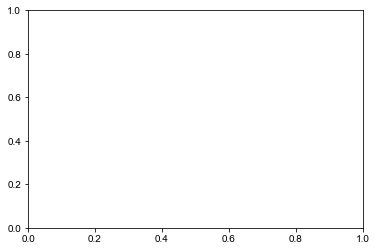

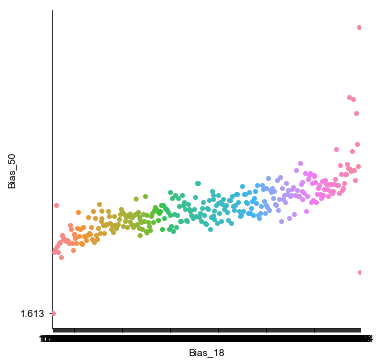

In [9]:
bias_list = list(df_scatter.columns)
sns.swarmplot(x='Bias_18', y='Bias_50', data=df_scatter)
plt.show()

# STEP 5: Show the distribution of a single bias voltage


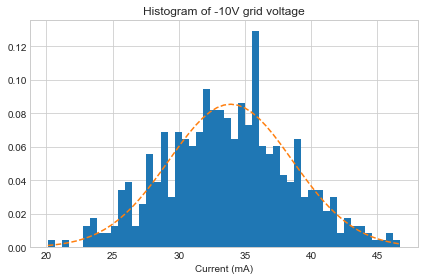

In [10]:
# Histogram of a single column

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

sigma = df_stats.iat[2, 5]
mu = df_stats.iat[1, 5]
x = mu + sigma  * np.random.randn(437)
num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Current (mA)')
# ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of -10V grid voltage')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [11]:
from numpy import linspace
from scipy.stats.kde import gaussian_kde

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly

import colorcet as cc

output_file("joyplot.html")

def joy(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = list(reversed(probly.keys()))

palette = [cc.rainbow[i*15] for i in range(17)]

x = linspace(-20,110, 500)

source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, plot_width=900, x_range=(-5, 105), toolbar_location=None)

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(probly[cat])
    y = joy(cat, pdf(x))
    source.add(y, cat)
    p.patch('x', cat, color=palette[i], alpha=0.6, line_color="black", source=source)

p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis[0].ticker

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.y_range.range_padding = 0.12

show(p)

In [ ]:
cols_y_values = [str(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        
cols_y_values

# STEP 6: Calculate the differences between all tubes

In [12]:
from ipywidgets import FloatProgress
from IPython.display import display
import time

start_time = time.time() 

def build_difference_df(df, df_stats):
    
    # Display a progress bar
    build_diff_progress_bar = FloatProgress(min=0, max=100)
    display(build_diff_progress_bar)
       
    # Make a list of all the columns in the dataframe
    cols = list(df.columns)
    
    # Make a list of just the bias columns
    bias_list = []
    for i in cols:
        if i.startswith('Bias_') == True:
            bias_list.append(i)
    
    # BMake an empty list to hold the calculated values, to be used to build the difference dataframe
    diff_squared_list = []
    
    # Iterate through the index of tubes in the master dataframe to select a reference tube
    for each_ref_tube in df.index:
        
        # Get the next reference tube data, as a series
        ref_tube = df.iloc[each_ref_tube]
        ref_tube_ID = ref_tube.tube_ID

        # Iterate through the index of tubes in the master dataframe to select a match tube
        for each_match_tube in df.index:
            
            # Get the next tube data to be compared, as a series
            match_tube = df.iloc[each_match_tube]
            match_tube_ID = match_tube.tube_ID
            
            # Dictionary container to hold the difference variables for each tube
            temp_dict = {}
            
            # Compute the squares of the differences in each current measurement
            error_sum = 0
            for bias in enumerate(bias_list):
                mismatch = ((float(match_tube.loc[bias[1]]) - float(ref_tube.loc[bias[1]]))**2)
                temp_dict[bias[1]] = mismatch
                error_sum = error_sum + mismatch

            # Add other relevant key/value pairs to the dictionary  
            temp_dict['ref_tube_ID'] = ref_tube_ID
            temp_dict['match_tube_ID'] = match_tube_ID
            temp_dict['error_sum'] = error_sum

            # Append the tube's calculated values to the diff_squared_list
            diff_squared_list.append(temp_dict)
            
            # Update the progress bar
            build_diff_progress_bar.value += 1

    
    # Make an ordered list for the columns of the new difference dataframe
    new_cols_to_add = ['ref_tube_ID', 'match_tube_ID', 'error_sum']
    df_dif_cols = new_cols_to_add + bias_list
    df_dif = pd.DataFrame(diff_squared_list, columns = df_dif_cols)

    return df_dif
    
    
df_dif = build_difference_df(df, df_stats)

# Produce a brief report:
total_rows = len(df_dif)
total_columns = len(df_dif.columns)
total_datapoints = total_rows * total_columns
stop_time = time.time()
elapsed_time = stop_time - start_time
print("It took", round(elapsed_time, 2), "seconds to calculate", 
      total_datapoints, "values, resulting in", len(df_dif), "rows.")

# Display the head of the difference dataframe
df_dif.head()

FloatProgress(value=0.0)

It took 94.77 seconds to calculate 1669264 values, resulting in 104329 rows.


,ref_tube_ID,match_tube_ID,error_sum,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,198,198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,198,201,2300.452296,1160.356096,499.120281,243.016921,134.908225,87.422500,59.182249,39.980329,26.780625,18.198756,12.545764,8.649481,5.943844,4.347225
2,198,203,764.008486,356.152384,137.358400,70.492816,48.804196,37.380996,29.506624,23.600164,18.429849,14.055001,10.407076,7.485696,5.626384,4.708900
3,198,204,2699.633916,1293.409296,554.225764,280.060225,171.086400,120.758121,86.452804,62.220544,44.249104,31.047184,21.669025,15.155449,10.890000,8.410000
4,198,205,1248.483155,671.276281,238.300969,112.381201,65.788321,46.553329,33.698025,24.532209,17.926756,12.981609,9.418761,6.791236,4.941729,3.892729


# STEP 7: Find the best matches for a particular tube_ID

In [ ]:
# This function requires the tube_to_match and tube_set_size variable to be set manually, below.

def find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size):
    tube_to_match = str(tube_to_match)
    
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif[(df_dif.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(tube_set_size)
    
    return df_tube_set

tube_to_match = 203
tube_set_size = 7
df_tube_set = find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size)
df_tube_set.head(tube_set_size)


In [ ]:
# Total up the error_sum column to create a score for the tube set.  Lower is better. 
tube_set_score = df_tube_set.error_sum.sum()
print("Tube-set SCORE:", tube_set_score, " (Lower is better)")

# STEP 8:  Build a dataframe of the best matched sets in order

In [18]:
# math lib used for generating ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
import math


# Make a local version of df_dif that can be butchered
df_dif_copy = df_dif.copy()

def ask_tube_set_size():
    
    # Ask the user to enter the set size
    tube_set_size = input("Please enter the number of tubes per matched set:")
    
    # Build a list of tube names for the tube set size
    tube_sets_columns = ['Tube_' + str(1 + i) for i in range(int(tube_set_size))]    
    
    return tube_set_size, tube_sets_columns 


def find_best_set_for_chosen_tube_ID(df_dif_copy, tube_to_match, tube_set_size, tube_sets_columns):
    tube_to_match = str(tube_to_match)
        
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif_copy[(df_dif_copy.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(int(tube_set_size))
        
    # Create the dictionary of the tubes in the set and the total score of the set
    tube_set_list = list(df_tube_set.match_tube_ID)
    tube_set_dict = dict(zip(tube_sets_columns, tube_set_list))   
    tube_set_score = df_tube_set.error_sum.sum()
    tube_set_dict.update({'tube_set_score':tube_set_score})

    return tube_set_dict


def find_best_set(df_dif_copy, tube_set_size, tube_sets_columns):
    
    # Make an empty list to hold the tube sets and their scores
    tube_sets_and_scores_list = []
    temp_dict = {}
    
    if 'tube_set_score' in tube_sets_columns:
        tube_sets_columns.remove('tube_set_score')

    for i in df_dif_copy.ref_tube_ID.unique():
        temp_dict = find_best_set_for_chosen_tube_ID(df_dif_copy, i, tube_set_size, tube_sets_columns)
        tube_sets_and_scores_list.append(temp_dict)

    # Add 'tube_set_score' column name at the front of the list
    if 'tube_set_score' not in tube_sets_columns: 
        tube_sets_columns.insert(0, 'tube_set_score')    
    
    # Create a dataframe for the tube sets called df_tube_sets 
    df_tube_sets = pd.DataFrame(tube_sets_and_scores_list, columns=tube_sets_columns)
    
    # Sort the tube_set_score column, take the top row (with the lowest score) as a new df 
    df_best_set_temp = df_tube_sets.sort_values('tube_set_score').head(1)
        
    return df_best_set_temp
 
    
# Start a timer
start_time = time.time()   
    
# Make an empty dataframe to hold all the sets and their scores
df_best_tube_sets = pd.DataFrame()

# Get the tube_set_size and the tube_sets_columns from the ask_tube_set_size function
tube_set_size, tube_sets_columns = ask_tube_set_size()

# Get the best tube set from the batch
df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns) 

# Display a progress bar
progress_bar_range = int(len(df)/int(tube_set_size))
best_matched_progress_bar = FloatProgress(min=0, max=progress_bar_range)
display(best_matched_progress_bar)

# Append the best tube set to the df_best_tube_sets dataframe
df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

# Remove the best tube set from df_dif_copy
tube_delete_list = list(df_best_set_temp.iloc[0])
tube_delete_list.pop(0)
df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]

# A function to generate ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
ordinal_list = [ordinal(n) for n in range(1, int(len(df)))]

set_count = 1
print()
print("*** BEST! ***")
print(ordinal_list[0],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
print("TUBES:", tube_delete_list)

# Update the progress bar
best_matched_progress_bar.value += 1


while len(df_dif_copy.ref_tube_ID.unique()) >= int(tube_set_size):
    # Get all the rest of the sets from the batch
    df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns)
    
    # Append the best tube set to the df_best_tube_sets dataframe
    df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

    # Remove the best tube set from df_dif_copy
    tube_delete_list = list(df_best_set_temp.iloc[0])
    tube_delete_list.pop(0)

    df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
    df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]
    print()
    print(ordinal_list[set_count],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
    print("TUBES:", tube_delete_list)

    set_count += 1
    
    # Update the progress bar
    best_matched_progress_bar.value += 1


stop_time = time.time()
elapsed_time = stop_time - start_time
print()
print("It took", round(elapsed_time, 2), "seconds to produce", set_count, "tube sets.")


Please enter the number of tubes per matched set:16


FloatProgress(value=0.0, max=20.0)


*** BEST! ***
1st best tube set SCORE: 25.672518
TUBES: ['558', '353', '246', '533', '354', '382', '430', '466', '292', '277', '578', '319', '325', '205', '564', '487']

2nd best tube set SCORE: 27.356975
TUBES: ['579', '545', '282', '406', '465', '358', '334', '207', '420', '551', '255', '446', '474', '209', '338', '554']

3rd best tube set SCORE: 28.929682
TUBES: ['380', '525', '268', '427', '315', '510', '326', '215', '424', '257', '402', '528', '428', '442', '283', '504']

4th best tube set SCORE: 34.032212
TUBES: ['364', '281', '464', '452', '445', '509', '550', '494', '250', '370', '303', '453', '262', '248', '220', '522']

5th best tube set SCORE: 35.582821
TUBES: ['439', '323', '310', '350', '308', '552', '293', '263', '441', '219', '351', '595', '340', '260', '532', '290']

6th best tube set SCORE: 41.151436
TUBES: ['258', '583', '506', '377', '574', '571', '417', '223', '335', '472', '481', '256', '249', '366', '546', '536']

7th best tube set SCORE: 41.247549
TUBES: ['498',

In [35]:
# Display the tube sets as a dataframe
df_best_tube_sets = df_best_tube_sets.sort_values('tube_set_score')

best_set = list(df_best_tube_sets.iloc[0])[1:]
second_best_set = list(df_best_tube_sets.iloc[1])[1:]
worst_set = df_best_tube_sets.tail(1)
worst_set = list(worst_set.iloc[0])[1:]

df_best_tube_sets.head(12)

,tube_set_score,Tube_1,Tube_2,Tube_3,Tube_4,Tube_5,Tube_6,Tube_7,Tube_8,Tube_9,Tube_10,Tube_11,Tube_12,Tube_13,Tube_14,Tube_15,Tube_16
279,25.672518,558,353,246,533,354,382,430,466,292,277,578,319,325,205,564,487
284,27.356975,579,545,282,406,465,358,334,207,420,551,255,446,474,209,338,554
112,28.929682,380,525,268,427,315,510,326,215,424,257,402,528,428,442,283,504
96,34.032212,364,281,464,452,445,509,550,494,250,370,303,453,262,248,220,522
124,35.582821,439,323,310,350,308,552,293,263,441,219,351,595,340,260,532,290
27,41.151436,258,583,506,377,574,571,417,223,335,472,481,256,249,366,546,536
147,41.247549,498,480,221,557,514,449,482,448,539,475,572,389,477,251,485,547
78,41.468768,381,460,515,469,384,297,280,517,458,573,224,447,518,495,217,225
64,41.835959,356,307,375,496,387,524,344,530,398,369,471,468,478,379,567,479
46,54.281783,321,342,291,331,425,440,451,456,376,570,206,600,314,318,426,332


# STEP 9: Plot a line graph of the best set


In [63]:
# Plot a line graph of the best set

from bokeh.plotting import figure, output_file, show

output_file("Best Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(best_set)):
    row = df[df['tube_ID'] == best_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# STEP 10: Plot a line graph of the second-best set



In [22]:
# Plot a line graph of the best set

from bokeh.plotting import figure, output_file, show

output_file("Second-Best Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(second_best_set)):
    row = df[df['tube_ID'] == second_best_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# STEP 11: Plot a line graph of the worst set


In [37]:
# Plot a line graph of the worst set

from bokeh.plotting import figure, output_file, show

output_file("Worst Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(worst_set)):
    row = df[df['tube_ID'] == worst_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# Plot a line graph of a randomly selected set


In [64]:
# Plot a line graph of a randomly generated set

# Random set generator
import random

big_tube_list = df['tube_ID'].tolist()
random_tube_set = []

for i in range(int(tube_set_size)):
    random_tube_set.append(random.choice(big_tube_list))


# Plot the randomly selected set
    
from bokeh.plotting import figure, output_file, show

output_file("Worst Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(random_tube_set)):
    row = df[df['tube_ID'] == random_tube_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

### Everything below this line is experimental

In [ ]:
df_best_tube_sets.tube_set_score[:15].describe()


In [ ]:
import seaborn as sns
sns.set()

df_sns = df_best_tube_sets[['tube_set_score']][:15].copy()

sns.pairplot(df_sns, 'tube_set_score')
sns.plt.show()


In [ ]:
from bokeh.charts import Histogram, output_file, show

p = Histogram(df_best_tube_sets['tube_set_score'], title="Tube Set Scores")

output_file("histogram.html",)

show(p)

# Other Miscellaneous stuff

##### Apply a function to a column
df.Bias_2.max()

In [ ]:
% lsmagic

In [ ]:
%pprint



In [ ]:
# Applymap is useful for applying a function to all data
# For example, converting all data from floats to ints
# df.loc[2:7, 'Bias_2': 'Bias_50'].applymap(int)

In [ ]:
# List all available magics
% lsmagic

In [ ]:
# Display environmental variables
env_variables = %env
current_path = env_variables.get('PATH')
current_path

In [ ]:
mydict = % env
mydict.keys()

In [ ]:
% env

In [ ]:
# % time x = range(10000)
% timeit x = range(10000)
max(x)